# **Clasificación de Fitopatologías en Cultivos de Maíz**

## **Indice**

 0. Contexto

1. Introducción

2. Dataset

4. Librerías

4. Recopilación de Datos

5. EDA

6. Data Preprocessing

7. Modelado

8. Entrenamiento de los Modelos

9. Evaluación de los Modelos

10. Despliegue

11. Conslusión

12. Referencias

## **Contexto**

El cultivo de maíz en Argentina desempeña un rol fundamental en la economía agrícola del país, siendo una de las principales fuentes de ingresos para los productores y un recurso clave para la industria alimentaria y de biocombustibles. Sin embargo, este cultivo se enfrenta a diversos desafíos, entre los cuales las enfermedades representan una de las mayores amenazas para su rendimiento y calidad.

Las enfermedades en el maíz tienen su origen en múltiples agentes patógenos, como hongos, bacterias, virus y nematodos, que encuentran condiciones propicias en determinados climas, prácticas agrícolas y sistemas de manejo de cultivos. Entre las enfermedades más comunes se encuentran la ***Common Rost*** o Roya Común (causada por *Puccinia sorghi*), ***Gray Leaf Spot*** 0 Mancha Gris de la hoja (causada por *Cercospora zeae-maydis*), y ***Blight*** o marchitamiento bacteriano del maíz/marchitez de Stewart (causada por *Pantoea stewartii*). Estas patologías pueden propagarse rápidamente bajo condiciones ambientales favorables, como alta humedad y temperaturas moderadas, lo que hace imperativa su identificación y gestión tempranas.

Detectar y clasificar las enfermedades del maíz a tiempo es crucial debido al impacto significativo que estas tienen en el rendimiento del cultivo. Las infecciones no controladas pueden reducir drásticamente la productividad, afectar la calidad del grano y aumentar los costos de producción debido a la necesidad de tratamientos intensivos y tardíos. Además, la proliferación de enfermedades puede comprometer la sostenibilidad de los sistemas agrícolas, generando pérdidas económicas para los productores y reduciendo la disponibilidad de maíz en el mercado interno y externo.

En este contexto, el uso de herramientas tecnológicas avanzadas, como la inteligencia artificial y los sistemas de visión por computadora, emerge como una solución innovadora y eficaz para abordar este desafío. La implementación de modelos de clasificación de imágenes permite identificar de manera precisa y oportuna las enfermedades en las plantas, facilitando la toma de decisiones informadas y la aplicación de medidas correctivas antes de que los daños sean irreversibles.

Por lo tanto, el desarrollo de un sistema de clasificación para detectar enfermedades en cultivos de maíz no solo tiene el potencial de mejorar el manejo agrícola en Argentina, sino que también contribuye al fortalecimiento de la seguridad alimentaria y la sostenibilidad económica del sector. Este proyecto busca ser un aporte en ese sentido, integrando tecnología de vanguardia para resolver un problema crítico en la agricultura moderna.

<img src="/Users/santi/Corn_Disease_Detector/src/utils/images/maiz1.jpg" width=800 height=500>






## **Introducción**

Este proyecto se centra en la clasificación de enfermedades en cultivos de maíz mediante el uso de modelos avanzados de aprendizaje profundo. El objetivo principal es desarrollar un sistema capaz de identificar, de manera precisa y automatizada, cuatro categorías de imágenes: tres correspondientes a enfermedades específicas que afectan al maíz y una adicional que indica si la planta está sana.

El enfoque basado en deep learning aprovecha redes neuronales convolucionales (CNN), una arquitectura ampliamente utilizada en la clasificación de imágenes por su capacidad para extraer y aprender características visuales relevantes. Este tipo de modelo no solo permite diferenciar entre plantas sanas y enfermas, sino también identificar el tipo específico de enfermedad presente, lo que resulta clave para implementar estrategias de manejo adecuadas y oportunas.

El desarrollo de este proyecto tiene como finalidad aportar una solución tecnológica innovadora que no solo asista a los productores en la detección y gestión de enfermedades en cultivos, sino que también promueva un uso más eficiente de los recursos agrícolas, mejorando la productividad y reduciendo las pérdidas económicas asociadas a enfermedades no controladas. Este trabajo, por lo tanto, no solo tiene un impacto directo en el ámbito agrícola, sino también en la sostenibilidad y la seguridad alimentaria.



## **Dataset Description**

Nuestro dataset consta de 4188 imágenes clasificadas en 4 categorías/clases de las cuáles son 3 tipos de enfermedades en la planta y otra que se refiere a una planta sana:
- 0: Common Rust - 1306 images
- 1: Gray Leaf Spot - 574 images
- 2: Blight -1146 images
- 3: Healthy - 1162 images

Los datos fueron extraídos de la plataforma [***Kaggle***](https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset)

## **Librerías**

A continuación se encuentran todas las Librerías utilizadas en el proyecto, incluyendo `funciones`, el cuál es un archivo .py en el cuál se encuentran todas las funciones personalizadas.

In [1]:
## Librerias
# Data Analysis
import os, sys
sys.path.insert(0, "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/utils")
from collections import Counter
import numpy as np
import pandas as pd
import sklearn
import pickle
from sklearn.utils import shuffle

# Data Preproccesing
from collections import Counter
import pickle
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.preprocessing import label_binarize
from sklearn.utils.class_weight import compute_class_weight
from funciones import (cargar_dataset, guardar_dataset,
                       transformacion_datos_X, transformacion_datos_y_OneHotEncoding,transformacion_datos_y_LabelEncoding,
                       dimensiones_imagenes, distribución_x_clase,
                       classification_report, plot_confusion_matrix, plot_ROC_Curve)

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import cv2
import seaborn as sns

# Deep Learning (TensorFlow y tf.keras)
import tensorflow as tf
import tensorflow_hub as hub
from skimage.transform import resize
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Input, Dense, Conv2D, Flatten, Dropout,
                                     MaxPooling2D, GlobalAveragePooling2D,
                                     AveragePooling2D)
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.models import save_model

# Métricas
from sklearn.metrics import (confusion_matrix, classification_report, precision_recall_curve,
                            precision_score, recall_score,
                            f1_score, accuracy_score, roc_curve, auc)

## **1°. Recopilación de Datos**



Los datos deben dividirse en tres conjuntos diferentes: entrenamiento, validación y prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo, el conjunto de validación se utiliza para ajustar los hiperparámetros y la arquitectura del modelo, y el conjunto de prueba se utiliza para evaluar el rendimiento final del modelo.

Debido a que los datos no estan separados en Train-Test-Val carpetas, tendremos que realizarlo antes de empezar a trabajar el dataset.

Utilizamos `split_folders` una librería de Python que provee una manera simple y efectiva de separar/split nuestro dataset en training, validation, y testing sets.

Aplicamos el Método **Shuffle**: mezclamos los archivos antes de dividirlos en proporciones. Esto asegura que los datos estén distribuidos de manera aleatoria entre los conjuntos.

**Ventajas**<br>
* Reducción del Sesgo: Ayuda a asegurar que los datos de entrenamiento y prueba son representativos del mismo dominio, lo que reduce el sesgo y mejora la generalización del modelo.

* Mejora de la Convergencia del Modelo: En el caso de algoritmos que entrenan en minibatches, mezclar los datos puede llevar a una mejor convergencia y a un entrenamiento más eficiente.

* Validación Justa: En la validación cruzada, mezclar los datos asegura que cada fold es representativo del conjunto completo, lo que proporciona una evaluación más precisa del modelo.

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data"

splitfolders.ratio(path, # directorio/carpeta donde se encuentra las imagenes sin dividir en train/test/val. Dentro estan las 4 carpetas de cada clase
                   output="data_splitted", # nombre de la carpeta que contiene train-test y val. La llamamos data_splitted (data dividida)
                   seed=42, # Valor entero para establecer la semilla del generador aleatorio, permitiendo reproducir los mismos resultados en futuras ejecuciones.
                   ratio=(.8, .1, .1), # # ratio = .8, .1, .1 (80 %, 10%, 10%) train, validation y test respectivamente (% que quiero en cada carpeta)
                   move=False) # Determina si los archivos se mueven (True) o se copian (False) al directorio de salida.
                   #shuffle=True # Mezclamos los datos antes de dividir.

Nuestra data se encuentra ahora dividida en:

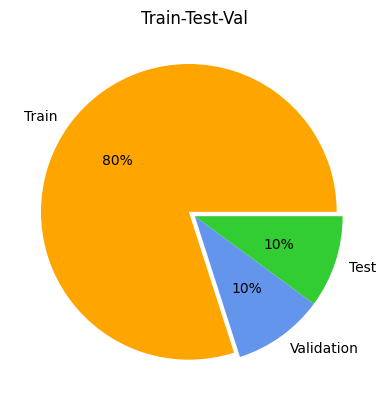

In [ ]:
# Grafico Pie
plt.pie([len(train), len(val), len(test)],
        labels=['Train', 'Validation', 'Test'],
        autopct='%.f%%',
        colors=['orange', 'cornflowerblue', 'limegreen'],
        explode=(0.05, 0, 0))
plt.title("Train-Test-Val")
plt.show()

## **2°. EDA**

El Análisis Exploratorio de Datos (EDA) es una etapa fundamental en cualquier proyecto de ciencia de datos, ya que permite comprender las características principales del conjunto de datos y detectar patrones, anomalías o problemas que puedan influir en el rendimiento del modelo.

El objetivo principal del EDA en este contexto es asegurarnos de que el dataset es representativo y de calidad para entrenar un modelo de Deep Learning. Esto incluye:

* ***Comprender la distribución de las clases***: Verificar si existe balance entre las categorías. Los desequilibrios pueden afectar negativamente el desempeño del modelo.

* ***Evaluar la calidad de las imágenes***: Identificar problemas como resoluciones inconsistentes, imágenes borrosas o con ruido.

* ***Detectar posibles anomalías***: Por ejemplo, imágenes etiquetadas incorrectamente o datos irrelevantes.

### Creación de Datasets: Train-Test-Val



In [ ]:
# Creamos una funcion para obtener los datasets con las imagenes (en array)
def creacion_dataset(folder_path):
  dataset = [] # lista con todas las imagenes (rutas)
  # Iteramos en clases
  for class_name in clases: # lista nombres clases
    # Lista de las imagenes
    images_names = os.listdir(folder_path +'/'+ class_name)
    # Iteramos en las imagenes
    for img_name in images_names:
      image_path = folder_path +'/'+ class_name +'/'+ img_name
      image_array = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) # pasamos la imagen a array con la imagen a color
      dataset.append(image_array) # agregamos el array a la lista

  return dataset

# Creamos los datasets train-test-val:
train = creacion_dataset(train_path)
test = creacion_dataset(test_path)
val = creacion_dataset(val_path)

In [ ]:
# Rutas de cada dataset: train-test-val:
train_path = "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/train"
test_path = "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/test"
val_path = "/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/val"

### Visualización de Data



In [ ]:
def visualizacion_imagenes(folder_path, n_imagenes_x_clase):
  images = []
  labels = []
  # Iteramos en clases
  for class_name in clases: # lista nombres clases
    # Lista de las imagenes
    images_names = os.listdir(folder_path +'/'+ class_name)
    # Iteramos en las imagenes
    for img_name in images_names[0:n_imagenes_x_clase]:
      image_path = folder_path +'/'+ class_name +'/'+ img_name
      images.append(image_path)
      labels.append(class_name)

  return images, labels

Text(0.5, 0.98, 'Train images')

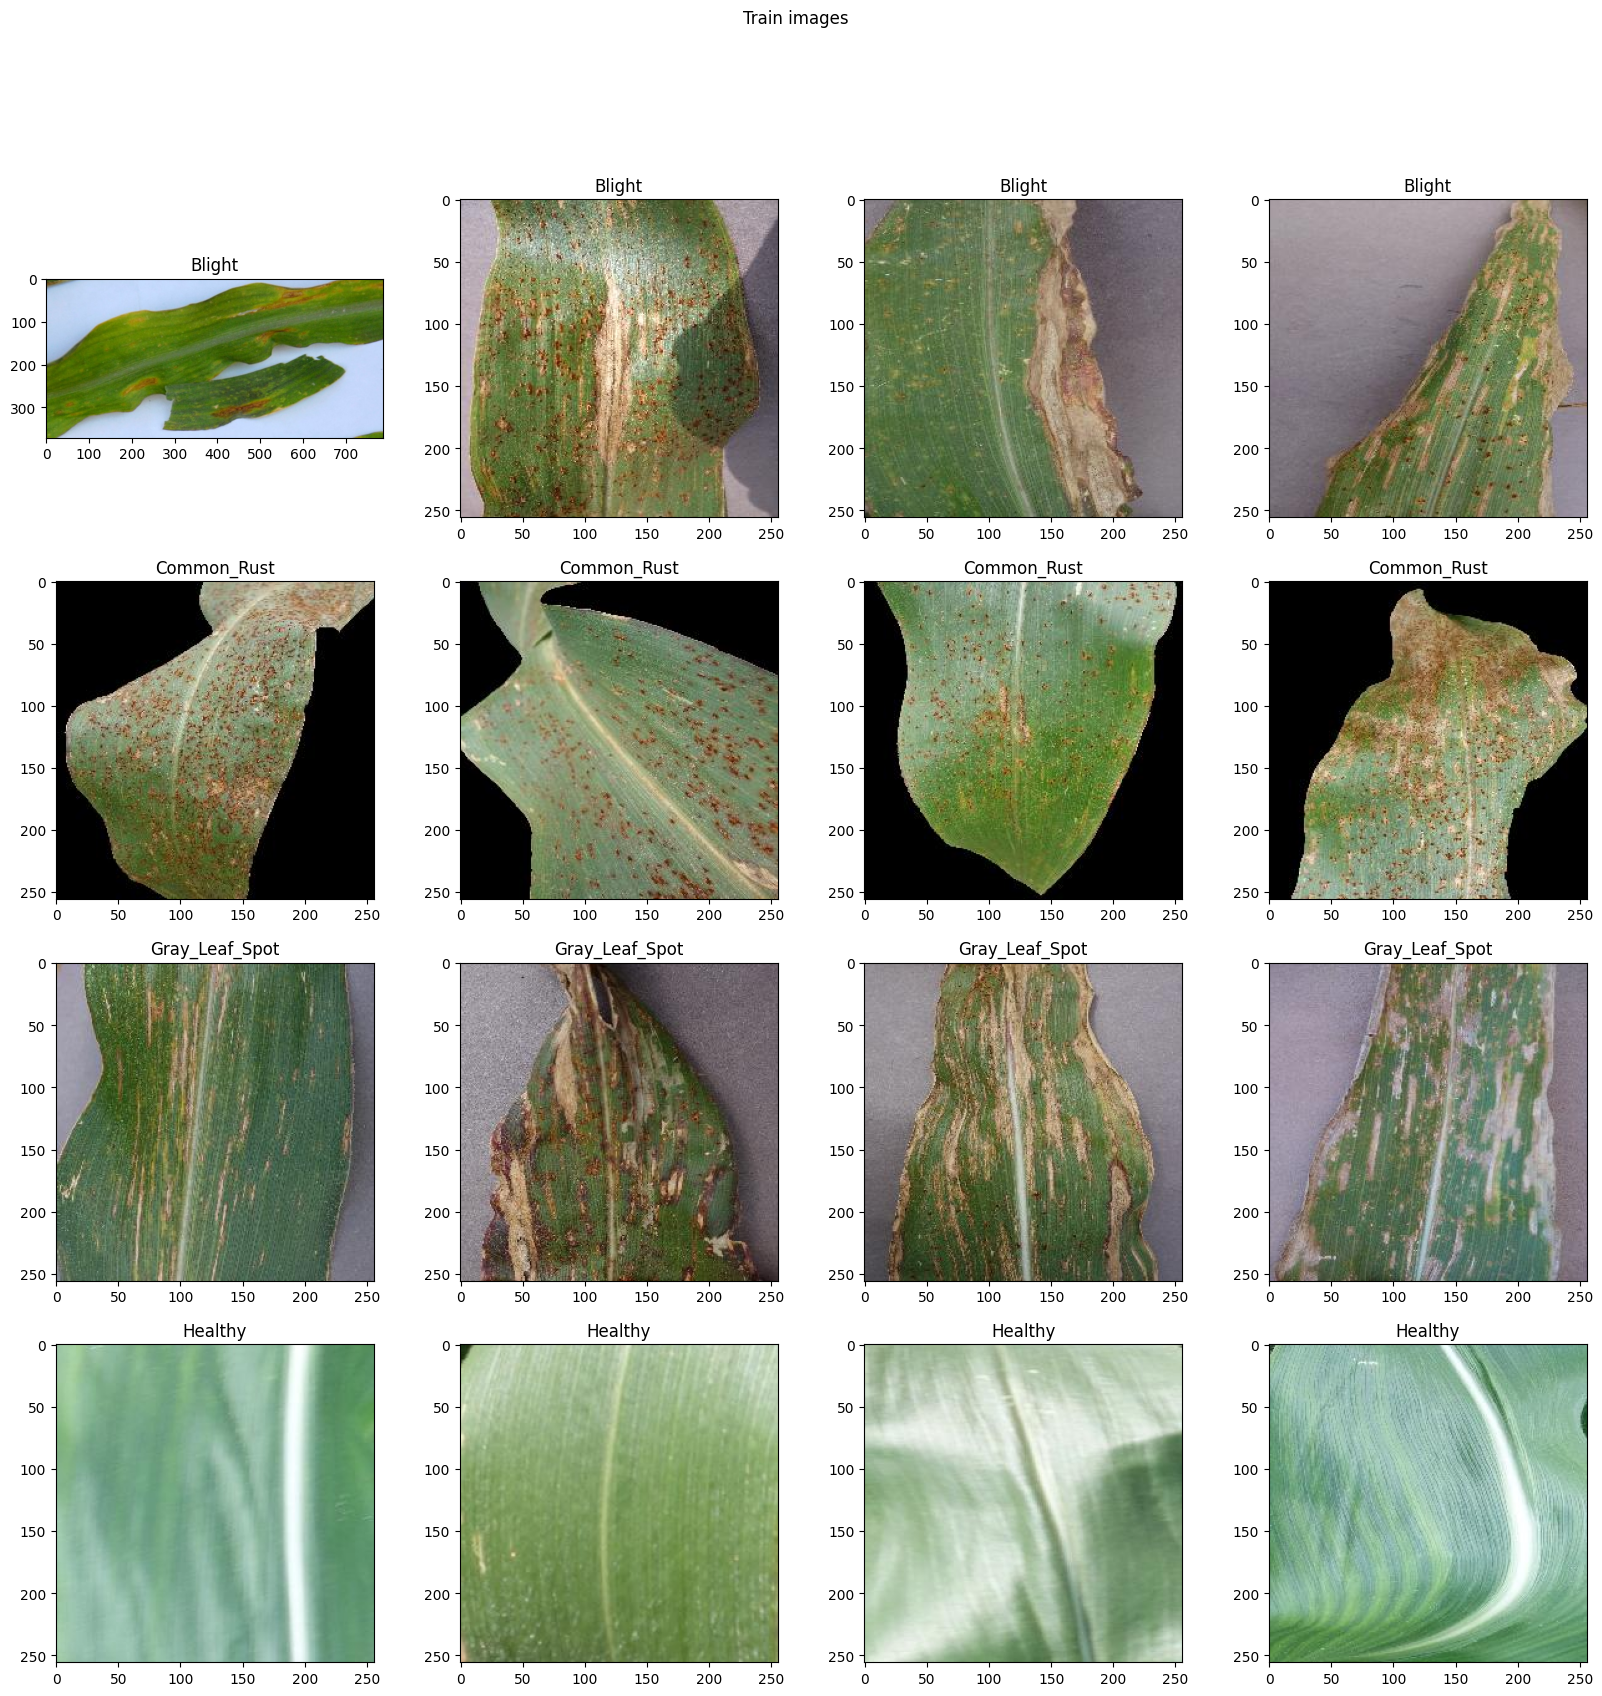

In [ ]:
# Visualizamos 4 imagenes de cada clase en el dataset Train:
images, labels = visualizacion_imagenes(train_path, 4)

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 19))
ax = ax.flatten()
for i in range(16): # iteramos 16 veces porque son 16 imagenes
    ax = plt.subplot(4,4,i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(images[i]), cv2.COLOR_BGR2RGB)) # mostramos la imagen a color
    plt.title(labels[i])
fig.suptitle('Train images')

### Comprensión de las Variables

Cada dataset: train, test, val, es un array de 4D *(n° d eimagenes, alto, ancho, canales)*

Cada pixel esta compuesto de 3 canales para el rojo, verde, azul por eso tiene 3 valores cada pixel.

Los pixeles toman valores entre **[0 , 255]**.


array([[[ 79,  87,  28],
        [ 73,  81,  24],
        [ 74,  83,  28],
        ...,
        [ 88, 111,   3],
        [ 88, 111,   3],
        [ 88, 111,   3]],

       [[ 83,  93,  32],
        [ 80,  90,  30],
        [ 79,  90,  32],
        ...,
        [ 84, 107,   1],
        [ 84, 107,   1],
        [ 84, 107,   1]],

       [[ 70,  85,  18],
        [ 71,  86,  21],
        [ 69,  85,  22],
        ...,
        [ 83, 108,   6],
        [ 85, 107,   6],
        [ 85, 107,   6]],

       ...,

       [[ 96, 132,  22],
        [ 94, 130,  20],
        [ 99, 133,  23],
        ...,
        [ 80, 118,  15],
        [ 76, 114,  11],
        [ 75, 113,  10]],

       [[ 98, 132,  20],
        [ 95, 129,  17],
        [ 97, 131,  21],
        ...,
        [ 78, 116,  15],
        [ 74, 112,  11],
        [ 73, 111,  10]],

       [[100, 134,  22],
        [ 96, 130,  18],
        [ 98, 132,  22],
        ...,
        [ 75, 113,  12],
        [ 73, 111,  10],
        [ 71, 109,   8]]], dtype=uint8)
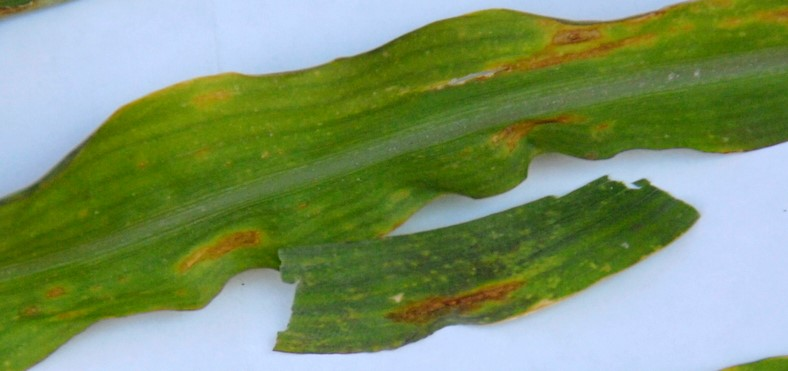

In [ ]:
# Con el 1° array obtenemos la info de la 1° imagen en formato matriz que es un array de 3D
train[0]

In [ ]:
# Array de 4D con la info de todas las imagenes (el valor de los pixeles de todas las imagenes).
train[0][1][0]    # Con el 1° array obtenemos la clase y la info de la imagen en formato matriz que es un array de 3D
                  # Con el 2° array obtenemos un array de 2D que nos lleva al n° de fila de esa imagen [[valor canal rojo, valor canal verde, valor canal azul],....[]]
                  # Con el 3° array obtenemos el valor de ese pixel


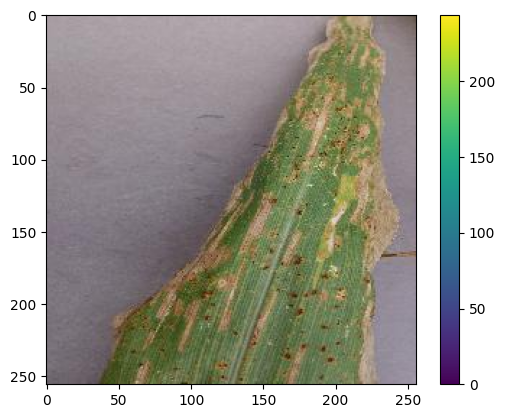

In [ ]:
# Observamos que valores toma cada pixel
plt.figure()
plt.imshow(train[3]), #cmap = "Greys")
plt.colorbar()
plt.grid(False)
plt.show()

### Cantidad de Imágenes


In [ ]:
print("Dataset train: {} imagenes".format(len(train)))
print("Dataset test: {} imagenes".format(len(test)))
print("Dataset val: {} imagenes".format(len(val)))
print("Total Imagenes: {}".format(len(train)+len(test)+len(val)))

Dataset train: 3348 imagenes
Dataset test: 423 imagenes
Dataset val: 417 imagenes
Total Imagenes: 4188


### Dimensiones/Shape de cada Dataset

In [ ]:
# Creamos una función para observar que dimensiones/shape tienen las imágenes
# dicha función nos devolvera un diccionario con las keys (ancho, alto, channels) y la cantidad de imágenes que tienen esa dimensión

def dimensiones_imagenes(dataset):
  # Creamos una lista con todas las dimensiones que hay
  l_shapes = []
  for i in range(0,len(dataset)):
    shape = dataset[i].shape
    l_shapes.append(shape)
  # Creamos un diccionario donde las keys son las dimensiones, los values el n° de veces que esta esa dimension
  d = {}
  for shape in l_shapes:
    if shape in d: # si la dimension esta en el d, le sumanos 1 a su value
      d[shape]+=1

    else:
      d[shape] = 1 # si no esta en el d, introducimos esa dimension y su value es 1
  # Iteramos en el diccionario creado
  for key in d:
    print("{} --> {} imagenes".format(key, d[key]))

  return d

In [ ]:
# Visualizamos las dimensiones en train
train_shapes = dimensiones_imagenes(train)
print("-----------------------")
print("train:  {} tipos de dimensiones".format(len(train_shapes)))

(371, 788, 3) --> 1 imagenes
(256, 256, 3) --> 3089 imagenes
(482, 641, 3) --> 1 imagenes
(200, 300, 3) --> 3 imagenes
(421, 1080, 3) --> 1 imagenes
(237, 363, 3) --> 1 imagenes
(279, 519, 3) --> 1 imagenes
(1125, 1500, 3) --> 3 imagenes
(339, 300, 3) --> 1 imagenes
(1936, 2592, 3) --> 1 imagenes
(240, 362, 3) --> 1 imagenes
(3264, 1489, 3) --> 1 imagenes
(200, 250, 3) --> 1 imagenes
(2731, 1819, 3) --> 1 imagenes
(2448, 2448, 3) --> 1 imagenes
(1600, 1200, 3) --> 3 imagenes
(374, 594, 3) --> 1 imagenes
(335, 662, 3) --> 1 imagenes
(1200, 1158, 3) --> 1 imagenes
(612, 450, 3) --> 1 imagenes
(3071, 884, 3) --> 1 imagenes
(2448, 3264, 3) --> 6 imagenes
(414, 675, 3) --> 1 imagenes
(463, 618, 3) --> 1 imagenes
(611, 995, 3) --> 1 imagenes
(267, 400, 3) --> 1 imagenes
(534, 334, 3) --> 1 imagenes
(417, 635, 3) --> 1 imagenes
(290, 432, 3) --> 1 imagenes
(512, 1024, 3) --> 2 imagenes
(400, 600, 3) --> 2 imagenes
(317, 188, 3) --> 1 imagenes
(768, 1024, 3) --> 7 imagenes
(540, 960, 3) --> 2 

* Podemos observar que estamos trabajando con arrays de diferentes dimensiones, es decir, imágenes con diferentes número de pixeles. Tendremos que homogeneizar las dimensiones a una única para que nuestros modelos entrenen correctamente.

* La dimension que más se repite es de (256, 256, 3)

### Distribución de cada clase/target

Al ser un problema de ML de clasificación, debemos procurar que nuestros datos en train estén balanceados:

<ipython-input-26-b38300f01038>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['Class_Name'], y=df["N° of Images"], palette='Greens_d')


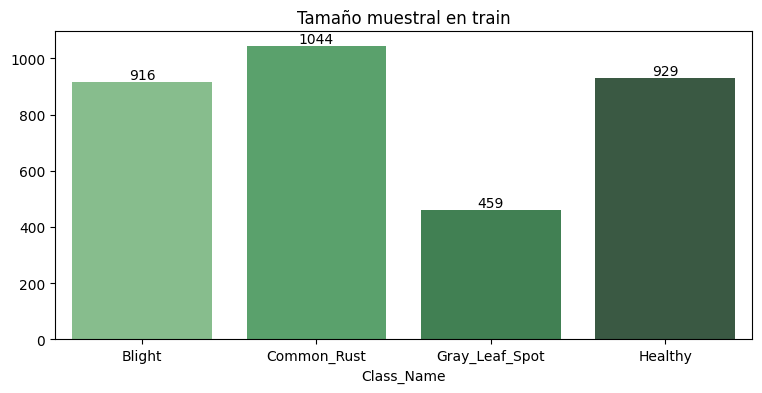

In [ ]:
def distribución_x_clase(train_path):
  # Creamos un diccionario con {clase: n° de imagenes de esa clase}
  name_clases = os.listdir(train_path)
  d = {}
  for name_clase in name_clases:
    clase = os.listdir(train_path + '/' + name_clase)
    d[name_clase] = len(clase)

  # Creamos el df
  df = pd.DataFrame(columns = ["Class_Name", "N° of Images"])
  # Insertamos los valores en cada columna del df
  df['Class_Name'] = d.keys()
  df["N° of Images"] = d.values()

  return df

df_train = distribución_x_clase(train_path)

# Funcion de Distribucion de imagenes por Clase:
def class_distribution(df):

  plt.figure(figsize=(9,4))
  ax = sns.barplot(x=df['Class_Name'], y=df["N° of Images"], palette='Greens_d')
  plt.title('Tamaño muestral en train')
  plt.ylabel('', fontsize=18)
  for bars in ax.containers:
        ax.bar_label(bars)

  plt.show()

class_distribution(df_train)

* Observamos que nuestros datos están desbalanceados, es decir nuestra target.

* Es necesario entrenar con un dataset lo más equilibrado/balanceado posible para que la precisión del modelo sea la mas alta posible. Si esto no ocurre, nuestro modelo tendera a predecir con menor frecuencia la clase minoritaria.

* En nuestro caso contamos con una minoria en la clase `Gray_Leaf_Spot`.

## **3°. Data Preprocessing**

En este proyecto, donde buscamos clasificar imágenes de cultivos de maíz según su estado de salud o enfermedad, el preprocesamiento es esencial para estandarizar las imágenes y mejorar la capacidad de generalización del modelo.

El objetivo principal del preprocesamiento en este contexto es preparar las imágenes para que el modelo pueda aprender de manera eficiente y sin sesgos innecesarios. Esto incluye:

***Datos de entrada (X)***:
* ***Ajuste de tamaño y formato***: Normalizar todas las imágenes a una dimensión estándar (por ejemplo, 224x224 píxeles) para garantizar uniformidad en la entrada del modelo.

* ***Normalización de valores de píxeles***: Convertir los valores de los píxeles a un rango entre 0 y 1 (dividiendo por 255) o aplicar normalización específica para ciertos modelos preentrenados.

* ***Aumentación de datos (Data Augmentation)***: Aplicar transformaciones aleatorias como rotaciones, cambios de brillo, espejados o zoom para aumentar la diversidad del dataset y mejorar la generalización del modelo.

***Datos de salida/Target (y)***:

* ***Codificación de etiquetas***: Las etiquetas y deben estar codificadas como números enteros que representen las clases. Esto se hace utilizando la codificación one-hot, donde cada clase se representa como un vector binario con un 1 en la posición correspondiente a la clase y 0 en todas las demás posiciones.

* ***Conjunto de datos balanceado***: Es importante que el conjunto de datos esté balanceado, lo que significa que hay aproximadamente la misma cantidad de muestras en cada clase. Esto ayuda a evitar sesgos en el modelo hacia las clases más comunes.

* ***Class Weights***: En el EDA pudimos demostrar que la clase ***Gray_Leaf_Spot*** contiene menos imágenes que otras clases, por lo que puede afectar los resultados. Agregarémos ***class weights*** (pesos de clase) para abordar este problema de desbalanceo de clases.

  La fórmula utilizada es la siguiente:
  #### $w_j= \frac{N}{k.n_j}$  

  * $w_j$: es el peso de la clase $j$.
  * $N$: n° total de imagenes.
  * $k$: n° total de clases.
  * $n_j$: n° de imagenes de la clase $j$.


***Herramientas utilizadas***

* `TensorFlow/Keras` (tf.image y ImageDataGenerator): Para la normalización y aumentación de datos en tiempo real.

* `OpenCV y PIL (Pillow)`: Para la manipulación de imágenes, como cambios de tamaño, conversiones de formato y mejoras de calidad.

* `NumPy`: Para la transformación de datos en matrices y manipulación eficiente de píxeles.

### Creación de las variables: X, *y*

In [ ]:
# Creamos una funcion para crear los arrays X e y:
def creacion_listas_X_y(folder_path):
  X = []
  y = []
  #Lista con los nombres de cada clase:
  clases = os.listdir("/content/drive/MyDrive/Colab Notebooks/MAIZ/src/data/data_splitted/train")
  # Definimos las dimensiones de las imágenes
  img_width, img_height = 256, 256 # image_size

  # Iteramos en clases
  for class_name in clases: # lista nombres clases
    # Lista de las imagenes
    images_names = os.listdir(folder_path +'/'+ class_name)
    # Iteramos en las imagenes
    for img_name in images_names:
      image_path = folder_path +'/'+ class_name +'/'+ img_name # ruta de la imagen
      image_array = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) # pasamos la imagen a array con la imagen a color
      image = cv2.resize(image_array, (img_width, img_height)) # data preprocessing
      image = np.array(image) # usamos numpy para tener la imagen en array
      image = image.astype('float32') # pasamos la imagen a tipo 'float32'
      X.append(image) # agregamos la imagen a X
      y.append(class_name) # agregamos su nombre/target a y

  return X, y # retornamos una tupla con los valores (X, y)

X_train, y_train = creacion_listas_X_y(train_path)
X_test, y_test = creacion_listas_X_y(test_path)
X_val, y_val = creacion_listas_X_y(val_path)

### Data Transformation

#### **X**<br>

Aplicaremos las siguientes Transformaciones:

**Estandarizacion de los Datos**:
* Los valores del canal RGB (píxeles) están en el rango [0, 255].
* Normalizamos los valores para que estén en el rango [0, 1].

In [ ]:
def transformacion_datos_X(X_train, X_test, X_val):

  # Convertimos las listas en arrays:
  X_train = np.array(X_train)
  X_test = np.array(X_test)
  X_val = np.array(X_val)

  # Creamos una lista con las X:
  data_X = [X_train, X_test, X_val]
  for X in data_X:
    # Normalizamos las imagenes a valores entre [0, 1]:
    for i in range(0, len(X)):
      X[i] /= 255

  return X_train, X_test, X_val

X_train, X_test, X_val = transformacion_datos_X(X_train, X_test, X_val)

# Visualizamos las dimensiones
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("X_val: {}".format(X_val.shape))

X_train: (3348, 256, 256, 3)
X_test: (423, 256, 256, 3)
X_val: (417, 256, 256, 3)


In [ ]:
# Visualizamos Normalizacion
print("Escalado: [{}, {}]".format(np.min(X_train[0]), np.max(X_train[0])))

Escalado: [0.0, 1.0]


#### Target : ***y***

Debido a que nuestro target original está en formato categórico, deberemos transformalo a numérico para poder aplicar posteriormente modelos de Deep Learning y Transfer Learning.

***One Hot Encoding of Labels***: El objetivo de esta accion es convertir los datos de la etiqueta de clase al mismo formato de la salida de nuestra red neuronal,como vectores numéricos binarios one-hot , en el que solo un elemento es 1 (indicando la categoría activa) y los demás son 0.

  * En nuestro caso:

  Si `y = 'Blight'` --> `y = [[1,0,0,0]]`<br>
  Si `y = 'Common_Rust'` --> `y = [[0,1,0,0]]`<br>
  Si `y = 'Gray_Leaf_Spot'` --> `y = [[0,0,1,0]]`<br>
  Si `y = 'Healthy'` --> `y = [[0,0,0,1]]`

In [ ]:
def transformacion_datos_y_OneHotEncoding(y_train, y_test, y_val):
  # 1°) Lista con los nombres de las clases:
  class_names = clases

  # 2°) Creamos diccionario: {clase1:0,...., claseN:n}
  clases_a_num = {class_name : index for index, class_name in enumerate(class_names)}

  # 3°) Mapeo
  y_train = list(map(lambda etiqueta: clases_a_num[etiqueta], y_train)) # etiqueta=label=numero [0,1,2,3]
  y_test = list(map(lambda etiqueta: clases_a_num[etiqueta], y_test))
  y_val = list(map(lambda etiqueta: clases_a_num[etiqueta], y_val))
  '''
  Argumentos de la funcion lambda :
  qué es lo que queremos que nos devuelva : condición/lo que buscamos

  Argumentos de la funcion Map(funcion, iterable)
  * Funcion: Es una función que se aplicará a cada elemento del iterable, en nuestro caso usamos lambda
  * iterable: Es la secuencia de elementos a la que se aplicará la función. Ej:lista, tupla

  list(): map() devuelve un objeto iterable, no puedes acceder a sus elementos directamente o inspeccionarlo fácilmente
          Por eso convertimos el resultado de map en una lista iterable
  '''

  # 4°) Conversion de v targets a numéricas:
  y_train = to_categorical(y_train,
                           num_classes=4)

  y_test = to_categorical(y_test,
                          num_classes=4)

  y_val = to_categorical(y_val,
                         num_classes=4)

  return  y_train, y_test, y_val

y_train_ohe, y_test_ohe, y_val_ohe = transformacion_datos_y_OneHotEncoding(y_train, y_test, y_val)

### Metodo `shuffle`

Como las imagenes están cargadas de forma ordenada vamos a mezclarlas aleatoriamente con este método el cual garantiza que la secuencia de desordenamiento sea siempre la misma en cada ejecución

In [ ]:
# Utilizamos una semilla aleatoria fija (random seed).
seed = 23
X_train, y_train = shuffle(X_train, y_train, random_state=seed)
X_test, y_test = shuffle(X_test, y_test, random_state=seed)
X_val, y_val = shuffle(X_val, y_val, random_state=seed)

### Método `class_weights`

Creamos un diccionario con los pesos calculados para cada clase con la fórmula. Cada clase recibe un peso proporcional a la cantidad de datos que tiene en comparación con el resto. Durante el entrenamiento, la pérdida se ajusta de manera que los errores en las clases menos representadas tengan un mayor impacto en la actualización de los parámetros del modelo.

In [ ]:
# Creamos un dataframe:
df_train = distribución_x_clase(train_path)

# Pesos originales
df_train['original_weights'] = df_train['N° of Images'] / df_train['N° of Images'].sum()

# Pesos definidos
df_train['new_weights'] = df_train['N° of Images'].sum()/(len(clases)*df_train['N° of Images'])
df_train

Class_Name  N° of Images  original_weights  new_weights
0          Blight           916          0.273596     0.913755
1     Common_Rust          1044          0.311828     0.801724
2  Gray_Leaf_Spot           459          0.137097     1.823529
3         Healthy           929          0.277479     0.900969

In [ ]:
# Creamos un diccionario con los pesos para cada clase:
class_weights = {i : df_train['new_weights'][i] for i in range(len(df_train))}
class_weights

{0: 0.9137554585152838,
 1: 0.8017241379310345,
 2: 1.8235294117647058,
 3: 0.9009687836383208}

## **4°. Modelado**


### CNN (Convolution Neural Networks)

En este proyecto, utilizamos ***Redes Neuronales Convolucionales (CNNs)*** ya que son un tipo de red neuronal especializada en el procesamiento de datos con estructuras espaciales, como imágenes en nuestro caso.

**¿Por qué aplicar CNNs en este proyecto?**<br>
Dado que trabajamos con imágenes de cultivos afectados por diferentes enfermedades, es fundamental contar con un modelo capaz de identificar texturas, colores y patrones visuales característicos de cada afección.

**Funcionamiento de una CNN**<br>
Las CNNs están compuestas por varias capas especializadas:

* Capas Convolucionales: Aplican filtros a la imagen de entrada para extraer características como bordes, texturas y formas.
* Capas de Pooling: Reducen la dimensionalidad y conservan la información más relevante, haciendo que el modelo sea más eficiente.
* Capas Densas (Fully Connected Layers): Interpretan las características extraídas y clasifican la imagen en una de las categorías establecidas.

En este proyecto, implementamos:

1. ***CNN desde cero (creada por nosotros)***







### Transfer Learning

El [***Transfer Learning***](https://keras.io/guides/transfer_learning/) (aprendizaje por transferencia) es una técnica que permite reutilizar modelos preentrenados en grandes conjuntos de datos y adaptarlos a una tarea específica. Nos permite aprovechar redes neuronales convolucionales (CNNs) ya entrenadas en millones de imágenes, evitando la necesidad de entrenar un modelo desde cero y adaptandolas a nuestro conjunto de datos.

A continuación se listan los Modelos utilizados:


2. ***InceptionV3***
3. ***MobileNet***
4. ***MobileNetV2***
5. ***MobileNetV3***
6. ***NASNetMobile***
7. ***ResNet50***
8. ***VGG16***
9. ***VGG19***


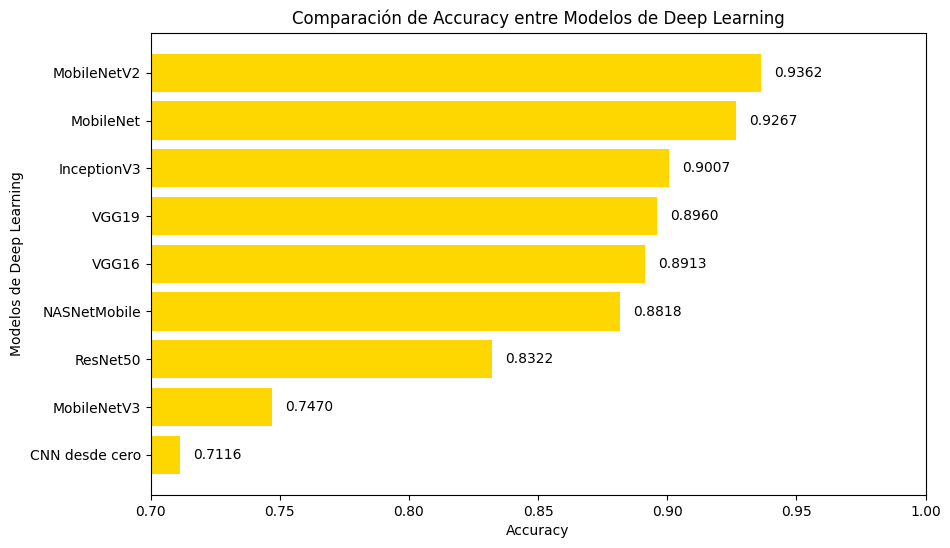

In [3]:
def modelos_accuracy():
    # Definir el diccionario con modelos y accuracy
    modelos = {
        "CNN desde cero": 0.7116,
        "InceptionV3": 0.9007,
        "MobileNet": 0.9267,
        "MobileNetV2": 0.9362,
        "MobileNetV3": 0.747,
        "NASNetMobile": 0.8818,
        "ResNet50": 0.8322,
        "VGG16": 0.8913,
        "VGG19": 0.896
    }

    # Ordenar por accuracy de menor a mayor
    modelos_ordenados = dict(sorted(modelos.items(), key=lambda x: x[1]))

    # Extraer nombres y accuracy ordenados
    nombres, valores = zip(*modelos_ordenados.items())

    # Crear gráfico de barras horizontales
    plt.figure(figsize=(10, 6))
    plt.barh(nombres, valores, color='gold')

    # Etiquetas y título
    plt.xlabel("Accuracy")
    plt.ylabel("Modelos de Deep Learning")
    plt.title("Comparación de Accuracy entre Modelos de Deep Learning")
    plt.xlim(0.7, 1.0)

    # Mostrar valores de accuracy en las barras
    for i, v in enumerate(valores):
        plt.text(v + 0.005, i, f"{v:.4f}", va='center', fontsize=10)

    # Mostrar el gráfico
    plt.show()

# Llamar a la función
modelos_accuracy()


Como el objetivo de este proyecto es obtener un modelo robusto y bien equilibrado para el uso en producción, **MobileNet** es la mejor opción.
* Su desempeño más alto en validación sugiere que está menos propenso a sobreajuste (overfitting) y es más estable.
* MobileNet tiene mejor desempeño en validación, con un +2% en Accuracy, Precision y Recall respecto a MobileNetV2.


### Modelo Secuencial
El modelo secuencial (**Sequential**) de Keras es una de las formas más simples y utilizadas para construir redes neuronales en TensorFlow/Keras. Se basa en una estructura lineal de capas, donde cada capa tiene una única conexión con la siguiente, lo que facilita su implementación y comprensión.

Es ideal para construir redes neuronales profundas donde las capas se apilan en un orden específico, desde la entrada hasta la salida.

La compilación del modelo en Keras es un paso esencial antes del entrenamiento. En esta etapa, se configuran los elementos clave que determinarán cómo el modelo ajusta sus pesos y aprende a partir de los datos.

Cuando se llama al método `model.compile()`, se establecen tres aspectos fundamentales:

* **Optimizador (optimizer)**: Determina cómo se ajustan los pesos del modelo en cada iteración. Utilizaremos ***Adam (Adaptive Moment Estimation)*** → Combinación de SGD con adaptabilidad, es el más usado en deep learning.

* **Función de pérdida (loss)**: Mide la diferencia entre las predicciones del modelo y los valores reales. Utilizaremos ***categorical_crossentropy*** → Para clasificación multiclase con etiquetas en formato one-hot-encoding.

* **Métricas (metrics)**: Evaluaciones adicionales para monitorear el rendimiento durante el entrenamiento. Utilizaremos accuracy → Calcula el % de acierto teniendo en cuenta todas las clases del algoritmo de clasificación:
    
  Accuracy = (TP + TN) / Total

  * **True Positives (TP)**: cuando la clase real del punto de datos era 1 (Verdadero) y la predicha es también 1 (Verdadero)
  * **Verdaderos Negativos (TN)**: cuando la clase real del punto de datos fue 0 (Falso) y el pronosticado también es 0 (Falso).








In [ ]:
# Definimos el Modelo que utilizarems
name_ model = ""
base_model = name_model(include_top=False,
                        weights="imagenet",
                        input_shape=(224,224,3))

for layer in base_model.layers: # Congelamos las capas para que el modelo no se reentrene y no pierda todo el aprendizaje
    layer.trainable = False

def prepare_model(base_model=base_model):

    # Seleccionamos el Sequential Model:
    model = Sequential()

    # 1° Añadimos el Modelo:
    model.add(base_model)

    # 2° Luego vamos añadiendo las capas:
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.2))
    model.add(Dense(len(clases), activation='softmax'))

    # 3° Compilamos
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


model = prepare_model()

# Mostramos la arquitectura del Modelo:
model.summary()

#### Modelo **MobileNet**

In [ ]:
model = Sequential()

# Arquitectura del Modelo Base:
base_model = tf.keras.applications.MobileNet(
    input_shape=(224, 224, 3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False, # No incluimos las 'fully-connected layers'
    weights="imagenet",
    classifier_activation="softmax")

base_model.trainable = False # No queremos que este modelo se reentrene, pues se perdería todo el aprendizaje que trae)

for layer in base_model.layers:
  layer.trainable=False

# Añadimos las capas ocultas y la final
model.add(base_model)
model.add(GlobalAveragePooling2D())  # Reduce (7, 7, C) -> (C)
model.add(Dropout(0.2))
model.add(Dense(len(clases), activation='softmax'))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,232,964 (12.33 MB)

 Trainable params: 4,100 (16.02 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

## **5°. Entrenamiento de los Modelos**



El entrenamiento del modelo en deep learning es el proceso mediante el cual la red neuronal aprende a realizar una tarea específica, ajustando sus pesos a partir de un conjunto de datos de entrenamiento. Este proceso se basa en minimizar el error (función de pérdida) mediante la optimización de los pesos con técnicas como el descenso del gradiente.

Durante el entrenamiento, el modelo:

* Propaga hacia adelante (forward pass): Calcula la salida basada en los datos de entrada y los pesos actuales.
* Calcula la pérdida: Evalúa la diferencia entre la predicción del modelo y el valor real.
* Propaga hacia atrás (backpropagation): Ajusta los pesos usando el algoritmo de descenso del gradiente.

Repite este proceso en múltiples épocas hasta que el modelo logra una buena generalización.


### Callbacks

Utilizaremos ***EarlyStopping***:<br>
Hiperparámetros:

* `monitor`: métrica a observar (val_loss, val_accuracy).
* `patience`: número de épocas sin mejora antes de detenerse.
* `restore_best_weights`: si True, restaura los mejores pesos encontrados.


In [ ]:
# Indicamos el Early-Stopping: patience indica que cuando se repite n veces que frene
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                           restore_best_weights=True)

### Hiperparámetros del Entrenamiento

Utilizaremos `model.fit()` para entrenar

Hiperparámetros:

`validation_data`: Permite evaluar el modelo con datos no vistos durante el entrenamiento, ayudando a evitar el sobreajuste.

`batch_size`: Cantidad de muestras procesadas antes de actualizar los pesos del modelo.

  * Batch pequeño (ej. 16 o 32) → Mayor precisión pero más lento.
  * Batch grande (ej. 128 o 256) → Más rápido pero puede perder precisión

`verbose`: Sirve para monitorear el progreso y detectar posibles problemas en el aprendizaje del modelo.

  * 0	: No muestra salida en la consola (modo silencioso).
  * 1	: Muestra una barra de progreso con métricas de cada época (recomendado para entrenamiento manual).
  * 2	: Muestra solo una línea por época, sin barra de progreso (útil en scripts o entornos sin consola interactiva).

`epochs`: Indica cuántas veces el modelo verá el conjunto de datos completo.

  * Un número muy bajo puede llevar a subajuste (el modelo no aprende lo suficiente).
  * Un número muy alto puede llevar a sobreajuste (memoriza los datos de entrenamiento y no generaliza bien).

`learning_rate`: Determina el tamaño de los ajustes de los pesos en cada iteración.

  * Valor alto (ej. 0.1) → Converge rápido pero puede ser inestable.
  * Valor bajo (ej. 0.0001) → Converge lentamente pero es más preciso.

`class_weight`: Se define como un diccionario donde cada clase tiene un peso asignado.


In [ ]:
# Entrenamiento del Modelo

n_epochs = 30

model_hist = model.fit(X_train, y_train,
                        validation_data= (X_test, y_test),
                        batch_size= 128,
                        verbose= 1,
                        epochs= n_epochs,
                        callbacks= callback)
                        #class_weight = class_weights)


Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 33s 670ms/step - accuracy: 0.5362 - loss: 1.1309 - val_accuracy: 0.8369 - val_loss: 0.3916
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - accuracy: 0.8644 - loss: 0.3652 - val_accuracy: 0.8842 - val_loss: 0.2840
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9020 - loss: 0.2582 - val_accuracy: 0.9078 - val_loss: 0.2508
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9152 - loss: 0.2272 - val_accuracy: 0.9102 - val_loss: 0.2359
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9182 - loss: 0.2196 - val_accuracy: 0.9149 - val_loss: 0.2258
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9257 - loss: 0.1949 - val_accuracy: 0.9173 - val_loss: 0.2249
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9311 - loss: 0.1866 - val_accuracy: 0.9125 - val_loss: 0.2167
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9266 - loss: 0.1907 - val_accuracy: 

## **6°. Evaluación de los Modelos**



### **Métricas para Clasificación**


### **Evaluación en Test**

#### Accuracy

La métrica más habitual. Calcula el % de acierto teniendo en cuenta todas las clases del algoritmo de clasificación. Esta métrica es muy fácil de entender, pero no profundiza en el % de acierto de cada clase.

Accuracy = (TP + TN) / Total

In [ ]:
# Tupla con los valores: (val_loss, val_accuracy):
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest loss:', round(test_loss,4))
print('Test accuracy:', round(test_acc,4))

14/14 - 6s - 445ms/step - accuracy: 0.9267 - loss: 0.1964

Test loss: 0.1964
Test accuracy: 0.9267


Observamos la función de pérdida (***loss function***) para calcular la diferencia entre las predicciones del modelo y los valores reales.

  * Siempre es positivo.
  * El objetivo es minimizar el loss para mejorar el desempeño del modelo.

Valores:
  * Mínimo: 0, cuando el modelo predice correctamente con certeza absoluta.
  * Máximo: ∞ si el modelo está completamente equivocado, o
log(C) en el peor caso (Para C clases), cuando el modelo predice con certeza la clase equivocada.


#### Predicciones

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1) # model.predict(X_test): obtenemos las probabilidades de cada clase en cada imagen.
                                                  # axis=1 para encontrar el índice del valor/probabilidad máxima en cada fila del array

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step


In [ ]:
# Convertimos y_test de one-hot(binario) a label-encoder(multiclase)
y_test = np.argmax(y_test, axis=1).reshape(-1,1) # (shape: (423,))

In [ ]:
# Para cambiar la dimension, que sea igual a la predicha:
y_test = y_test.reshape(len(y_test)) # otra forma: y_test.shape = y_pred.shape

In [ ]:
y_pred

array([0, 0, 2, 3, 2, 3, 1, 0, 0, 0, 3, 3, 3, 1, 2, 0, 3, 2, 0, 0, 3, 3,
       3, 0, 1, 0, 0, 0, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 2, 0, 1, 3, 0, 3,
       1, 1, 1, 3, 3, 1, 3, 3, 0, 1, 3, 0, 1, 1, 2, 3, 2, 0, 0, 0, 1, 2,
       3, 1, 1, 3, 1, 0, 0, 3, 0, 1, 1, 3, 0, 2, 0, 1, 1, 1, 3, 1, 1, 1,
       2, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3, 2, 2, 3, 3, 1, 1, 2, 1, 1, 3, 1,
       0, 3, 0, 0, 1, 1, 0, 1, 3, 2, 0, 3, 0, 1, 1, 1, 0, 1, 2, 0, 3, 3,
       3, 1, 0, 1, 1, 0, 0, 3, 3, 0, 0, 2, 0, 2, 3, 3, 1, 3, 3, 3, 1, 1,
       3, 1, 1, 2, 1, 1, 1, 3, 0, 1, 3, 2, 2, 1, 3, 3, 0, 0, 1, 1, 2, 1,
       0, 0, 2, 1, 3, 3, 0, 2, 1, 0, 0, 3, 0, 1, 2, 1, 0, 3, 3, 1, 2, 1,
       1, 1, 1, 1, 3, 0, 0, 0, 3, 3, 1, 3, 0, 1, 1, 0, 1, 0, 0, 3, 3, 0,
       2, 3, 0, 1, 0, 1, 1, 0, 1, 0, 1, 3, 0, 1, 2, 3, 2, 1, 3, 2, 1, 2,
       0, 1, 1, 0, 1, 2, 0, 3, 3, 1, 1, 1, 1, 3, 0, 2, 0, 1, 1, 1, 1, 2,
       1, 3, 3, 0, 3, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 3, 1, 0, 0, 3, 3, 3,
       2, 0, 3, 1, 0, 0, 3, 1, 0, 0, 1, 2, 0, 2, 2,

#### Classification Report













Aplicamos el ***Classification Report*** para:
  * Evaluar el rendimiento del modelo en términos de precisión, recall y F1-score.
  * Analizar el comportamiento del modelo en cada clase individualmente.
  * Diagnosticar problemas como el desbalance de clases.

Muestra las siguientes métricas por cada clase:

1️⃣ **Precision (Precisión)**: mide que % de las predicciones positivas fueron correctas, es decir, de los que ha predicho como 1, cuántos en realidad ha acertado. Precision, a diferencia del recall, pone foco en minimizar los FP.

 Precision = TP / (TP + FP)

2️⃣ **Recall (Sensibilidad o Tasa de Verdaderos Positivos)**: mide cuántos de los elementos de una clase fueron correctamente identificados. Se utiliza cuando queremos hacer foco en minimizar los FN (Falsos Negativos), en nuestro caso, si el modelo predice que el cultivo está sano cuando en realidad presenta algún tipo de enfermedad.
  * Alto recall → El modelo captura la mayoría de los ejemplos de esa clase.
  * Bajo recall → Muchos ejemplos reales de esa clase son mal clasificados.

Recall = TP / (TP + FN)

3️⃣ **F1-score**: Combinación de las métricas Precision y Recall.
  * Útil si hay clases desbalanceadas.
  * Un F1-score alto significa que el modelo es preciso y capta la mayoría de los casos positivos.

F1-score = 2 * Precision * Recall / (Precision + Recall)

4️⃣ **Soporte (support)**: Es el número de muestras reales en cada clase.


In [ ]:
# Primero debemos mapear y_pred e y_test a variables categoricas:
y_pred = [clases_a_cat[prediccion] for prediccion in y_pred] # Transformamos las predicciones de las imagenes en formato categorico (nombres de las clases)
y_test = [clases_a_cat[y_num] for y_num in y_test] # Transformamos de numerico a categorica los valores de y_test

In [ ]:
informe = classification_report(y_test, y_pred)
print(informe)

                precision    recall  f1-score   support

        Blight       0.88      0.89      0.88       116
   Common_Rust       0.98      0.98      0.98       132
Gray_Leaf_Spot       0.77      0.74      0.75        58
       Healthy       0.99      1.00      1.00       117

      accuracy                           0.93       423
     macro avg       0.90      0.90      0.90       423
  weighted avg       0.93      0.93      0.93       423



Utilizamos ***Weighted Average*** ya que:
  * Considera clases más grandes con más peso.
  * Útil en datasets desbalanceados, como es nuestro caso.

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))

Accuracy: 0.93
Precision: 0.93
Recall: 0.93


##### **Evaluación Global**<br>
✔ Accuracy (93%) → Indica que el modelo clasifica correctamente en la mayoría de los casos.<br>
✔ Macro Avg (0.90) → El modelo mantiene un desempeño equilibrado en todas las clases.<br>
✔ Weighted Avg (0.93) → Dado que algunas clases tienen más datos, el modelo sigue siendo robusto.<br>



##### **Análisis**

📌 **Descripción General**:
  * El modelo ha sido evaluado en un conjunto de datos con 423 muestras.
  * El rendimiento del modelo es muy alto, con una precisión global (accuracy) del 93%. Las métricas por clase indican que el modelo funciona bien, aunque hay diferencias de desempeño entre clases.

📌 **Interpretación por Clase**:<br>
1️⃣ `Clase "Blight" (Tizón)`<br>

  ✔ Precision = 0.88 → El 88% de las imágenes clasificadas como "Blight" son realmente "Blight".
  ✔ Recall = 0.89 → El 89% de las imágenes realmente "Blight" fueron correctamente detectadas.
  ✔ F1-score = 0.88 → Buen equilibrio entre precisión y recall.

🔍 Interpretación:
  * El modelo clasifica bien esta enfermedad, aunque hay margen de mejora.
  * Puede haber cierta confusión con "Gray Leaf Spot", ya que son enfermedades con síntomas similares.

***

2️⃣ `Clase "Common Rust" (Roya Común)`<br>

✔ Precision = 0.98 → El 98% de las predicciones de "Common Rust" son correctas.<br>
✔ Recall = 0.98 → Se identifican correctamente el 98% de los casos reales de "Common Rust".<br>
✔ F1-score = 0.98 → Excelente balance entre precisión y recall.

🔍 Interpretación:
  * El modelo detecta muy bien la roya común.
  * Pocos falsos positivos y falsos negativos.
  * No requiere grandes mejoras en este momento.

***

3️⃣ `Clase "Gray Leaf Spot" (Mancha Gris de la Hoja)`:<br>

⚠ Precision = 0.77 → Solo el 77% de las predicciones de "Gray Leaf Spot" son correctas.<br>
⚠ Recall = 0.74 → Se detectan correctamente el 74% de los casos reales.<br>
⚠ F1-score = 0.75 → La peor métrica entre todas las clases.

🔍 Interpretación:

* El modelo tiene problemas para identificar esta enfermedad.<br>

Posibles causas:<br>
  🔹 Similitud visual con "Blight".<br>
  🔹 Menor cantidad de datos en el conjunto de entrenamiento.<br>

Recomendación:<br>
✅ Agregar más ejemplos de "Gray Leaf Spot".<br>
✅ Refinar la segmentación de imágenes para mejorar la diferenciación.

***

4️⃣ `Clase "Healthy" (Sano)`:<br>

✔ Precision = 0.99 → Casi todas las imágenes clasificadas como "Healthy" son realmente sanas.<br>
✔ Recall = 1.00 → Todas las imágenes sanas fueron correctamente clasificadas.<br>
✔ F1-score = 1.00 → El modelo es perfecto en esta clase.<br>

🔍 Interpretación:<br>
* El modelo nunca confunde una planta sana con una enferma.
* Es la mejor clase en términos de desempeño.



#### Gráfico Train y Test Accuracy y Loss

Text(0.5, 1.0, 'Training and Validation - Accuracy')

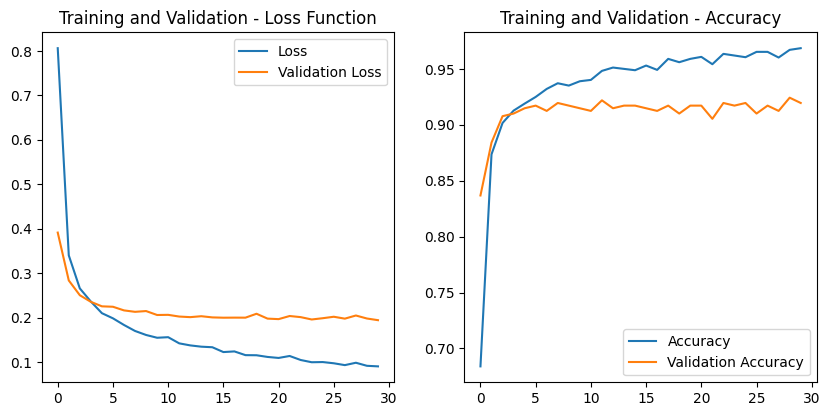

In [ ]:
# Graficos Train-Test Accuracy y Loss
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(model_hist.history['loss'], label='Loss')
plt.plot(model_hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(model_hist.history['accuracy'], label='Accuracy')
plt.plot(model_hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation - Accuracy')

##### 📌 **Análisis del Gráfico de Loss (Pérdida)**
📊 Interpretación:
  * La tendencia descendente en ambas curvas sugiere que el modelo está aprendiendo correctamente y minimizando el error.
  * Sin embargo, la validación tiene una pérdida ligeramente mayor, lo que indica que el modelo podría estar memorizando algunos patrones del conjunto de entrenamiento en lugar de generalizar perfectamente.

⚠ Posibles Problemas:
  * **Overfitting leve**: La pequeña diferencia entre Training Loss y Validation Loss al final del entrenamiento sugiere que el modelo podría beneficiarse de regularización adicional (Dropout, L2, Data Augmentation).

***

##### 📌 **Análisis del Gráfico de Accuracy (Precisión)**

📊 Interpretación:

  * El modelo aprende bien y alcanza un alto desempeño en validación, lo que indica que ***puede generalizar bien a datos no vistos***.
  * No hay un gap* excesivo entre Training Accuracy y Validation Accuracy, lo que sugiere que no hay overfitting severo.

**Gap: diferencia entre la precisión del entrenamiento (Training Accuracy) y la precisión de validación (Validation Accuracy)*.

***

✅ **Conclusiones Positivas**:<br>
✔ El modelo logra un buen desempeño general.<br>
✔ No hay signos graves de overfitting ni underfitting.<br>
✔ La validación es consistente con el entrenamiento.

#### Matriz de Confusión

Esta herramienta nos permite:
  * Identificar qué clases se confunden entre sí.
  * Medir la precisión y el recall de cada clase.

Interpretación de los valores:

* Cada fila representa las etiquetas reales.
* Cada columna representa las predicciones del modelo.
* ***Diagonal principal (valores en negrita)***: Cantidad de veces que el modelo predijo correctamente cada clase (True Positives, TP).
* ***Valores fuera de la diagonal***: Cantidad de errores de clasificación (False Positives, FP) donde el modelo asignó una etiqueta incorrecta.

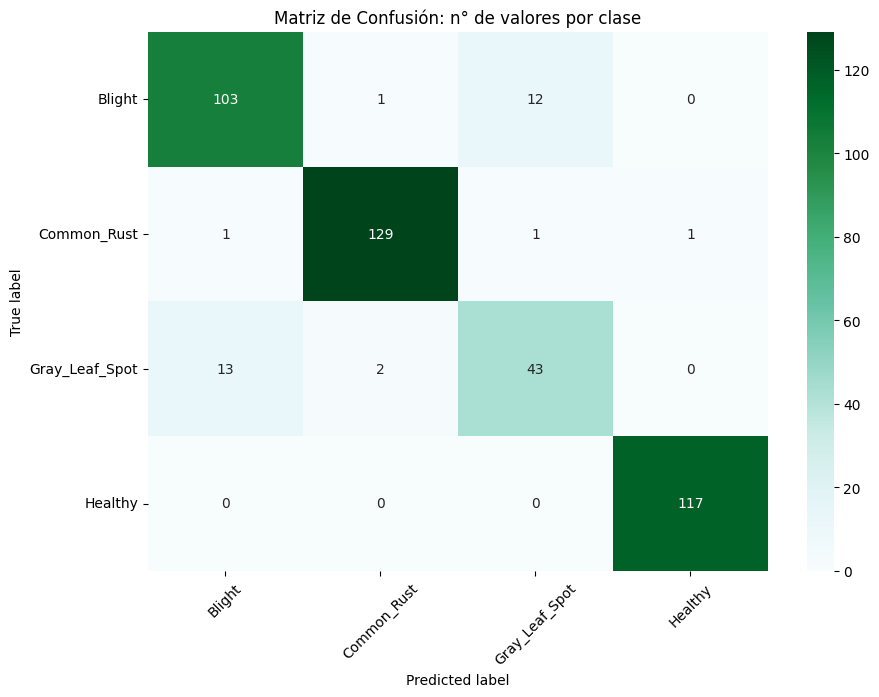

In [ ]:
# Generar la matriz de confusión
plot_confusion_matrix(y_test, y_pred,title='Matriz de Confusión: n° de valores por clase')

In [ ]:
# valores de la diagonal principal:
diagonal_sum = np.trace(confusion_matrix(y_test, y_pred))
print("Predicciones correctas: {}".format(diagonal_sum)) # suma de valores de la diagonal principal
print("Predicciones erroneas: {}".format(len(y_pred)-diagonal_sum)) # suma de valores fuera de la diagonal principaldiagonal_sum

Predicciones correctas: 392
Predicciones erroneas: 31


**Cálculo del % de acierto**

✅ **Exactitud en la clasificación de "Healthy" (Sano)**
  * El modelo clasificó correctamente 117 imágenes como "Healthy".
  * No hubo falsos positivos (otras categorías clasificadas como "Healthy").
  * Total de imágenes sanas: 117

Porcentaje de acierto en "Healthy":

$\frac{117}{117}\times100 =100\%$

✅ **Exactitud en la clasificación de cultivos "Enfermos"**

* La suma de los verdaderos positivos en clases enfermas:
  103 + 129 + 43 = 275

  * Total de imágenes enfermas: 103+129+43+1+12+13+2+1+1 = 305

Porcentaje de acierto en "Enfermos":

$\frac{275}{305}\times100 =90,16\%$

🎯 **Exactitud general en distinguir sano vs. enfermo**

* Total de imágenes correctamente clasificadas (sanas y enfermas): 117+275 = 392

* Total de imágenes evaluadas: 117+305 = 422

Porcentaje de acierto en distinguir sano/enfermo:

$\frac{392}{422}\times100 =92,89\%$



In [ ]:
# Crearemos una Matriz de Confusion con los % predichos para cada clase:
cm = confusion_matrix(y_test, y_pred) # creamos la Matriz de Confusion

# Calculamos los % de cada clase
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Redondear los valores a 1 decimal
cm_percent_rounded = np.round(cm_percent, 1)

# Convertir los valores redondeados a cadenas de caracteres
cm_percent_str = np.char.mod('%.1f', cm_percent_rounded)

# Agregamos el simbolo % a cada valor:
cm_porcentajes = np.char.add(cm_percent_str, '%')
cm_porcentajes

array([['88.8%', '0.9%', '10.3%', '0.0%'],
       ['0.8%', '97.7%', '0.8%', '0.8%'],
       ['22.4%', '3.4%', '74.1%', '0.0%'],
       ['0.0%', '0.0%', '0.0%', '100.0%']], dtype='<U6')

##### **📌 Análisis por clase**

**1.** `Blight`

  * 103 muestras (**88.8%**) clasificadas correctamente.
  * 12 muestras (**10.3%**) clasificadas erróneamente como "Gray Leaf Spot".
  * 1 muestra clasificada erróneamente como "Common Rust".
  
  Conclusión: El modelo tiene un buen desempeño en esta clase, pero hay cierta confusión con "Gray Leaf Spot".

**2.** `Common Rust`

  * 129 (**97.7%**) muestras clasificadas correctamente.
  * 1 muestra (**0.8%**) clasificada erróneamente como "Blight", "Gray Leaf Spot" y "Healthy".
  
  Conclusión: Excelentes resultados en esta clase, con un margen de error mínimo.

**3.** `Gray Leaf Spot`

  * 43 muestras (**74.1%**) clasificadas correctamente.
  * 12 muestras (**10.3%**) clasificadas erróneamente como "Blight".
  * 1 muestras (**0.8%**) clasificadas erróneamente como "Common Rust".
  
  Conclusión: Es la clase con más errores, principalmente confundida con "Blight". Puede deberse a similitudes visuales entre estas enfermedades.

**4.** `Healthy`

  * 117 muestras (**100%**) clasificadas correctamente.
  * No hay errores en esta clase.
  
  Conclusión: El modelo detecta perfectamente los cultivos sanos.

#### ROC Curve

De esta curva podemos obtener una medida, que es el ***AUC (Area Under the Curve)***.

* El AUC cuanto más cercano a 1, mejor será el clasificador.
* Si la curva es una línea recta estaremos ante un clasificador muy malo, que no sería muy diferente a un clasificador aleatorio.

Normalmente se usa la ROC curve cuando tenemos datasets balanceados, como es nuestro caso.

In [ ]:
def plot_ROC_Curve(y_pred, y_test):

  y_pred = [clases_a_num[prediccion] for prediccion in y_pred]
  y_test = [clases_a_num[y_num] for y_num in y_test]


  # Etiquetas para las clases
  class_labels = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

  # Binarizamos las etiquetas de y_test e y_pred:
  y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
  y_pred_binarized = label_binarize(y_pred, classes=[0, 1, 2, 3])

  # Calcular la ROC y el AUC para cada clase
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  n_classes = y_test_binarized.shape[1]

  for i in range(n_classes):
      fpr[i], tpr[i],_ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Calcular la ROC promedio y el AUC
  fpr["micro"], tpr["micro"], thresholds = roc_curve(y_test_binarized.ravel(), y_pred_binarized.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Graficar todas las curvas ROC
  plt.figure()
  plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='Curva ROC promedio (area = {0:0.2f})'.format(roc_auc["micro"]))

  colors = ['aqua', 'darkorange', 'cornflowerblue', 'darkred']
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC clase {0} (area = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Tasa de Falsos Positivos')
  plt.ylabel('Tasa de Verdaderos Positivos')
  plt.title('Curva ROC Multiclase')
  plt.legend(loc="lower right")
  plt.show()

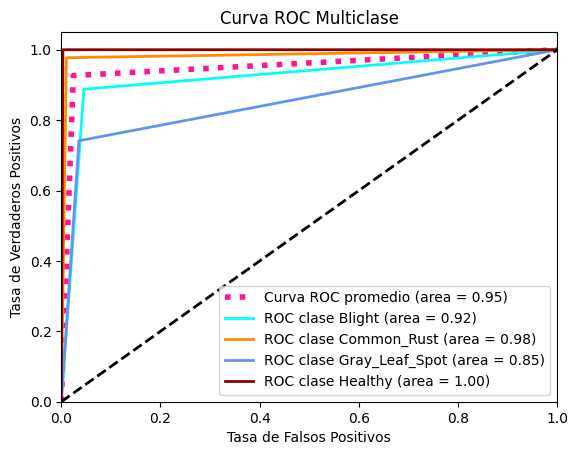

In [ ]:
plot_ROC_Curve(y_pred, y_test)

## **7°. Despliegue:** ***Streamlit***

El Modelo utilizado en este proyecto se encuentra, desplegado y listo para ser utilizado, en nuestra App realizada con Streamlit, un framework especializado en creación de web apps orientado a datos e inteligencia artificial basado en Python.

***
## **Conclusiones**

Modelo ***MobileNet*** :<br>
* ***Accuracy*** : 93%<br>
* ***Precision*** : 0.93<br>
* ***Recall*** : 0.93<br>

✅ Rendimiento general: El modelo muestra un buen desempeño con alta precisión en la mayoría de las clases.<br>

✅ "Common Rust" y "Healthy" están bien clasificadas.<br>

✅ El modelo clasifica correctamente los ***cultivos sanos el 100%*** de las veces.

✅ El modelo clasifica correctamente los ***cultivos enfermos el 90.16%*** de las veces.

✅ El modelo ***distingue entre sano y enfermo con un 92.89%*** de precisión.


⚠ El problema principal está en "Gray Leaf Spot", donde recall y precisión son los más bajos.

⚠ Errores más frecuentes: La clase "Gray Leaf Spot" es la más problemática, ya que es confundida con "Blight" en 13 casos.



## **Recomendaciones**

Para un correcto diagnóstico se recomienda tomar varias imágenes del cultivo que se quiere analizar y predecirlas con el modelo en la **App** para poder obtener mayor eficiencia en el diagnóstico.


## **Pasos a futuro**

* Incorporar más enfermedades para que el modelo detecte y diagnostique.

* Incorporar esta herramienta a una amplia varieda de cultivos tales como soja y trigo.

* Aumentar el tamaño muestral de datos por tipo de enfermedad para poder optimizar las métricas.

## **Referencias**

* College of Agriculture and Life Sciences, *Field Crops* , https://cals.cornell.edu/field-crops/corn/diseases-corn

* University of Nebraska, *Institute of Agriculture and Natural Resources*, https://cropwatch.unl.edu/plant-disease/corn/

* Giménez Pecci M. P., Laguna I. G., Lenardon S. L. (2012), *Enfermedades del maíz producidas por virus y mollicutes en Argentina*. INTA

* Keras, https://keras.io/api/

* https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/